<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# TAL Labo 1b : Segmentation de textes avec NLTK

**Objectifs**

Le but de cette deuxième partie du Labo 1 du Cours TAL est d'effectuer quelques opérations élémentaires sur les textes en utilisant la boîte à outils [NLTK](http://www.nltk.org/) en Python.  Vous utiliserez l'environnement mis en place dans la partie 1a : [Python 3](https://www.python.org/) avec _notebooks_ [Jupyter](https://jupyter.org/), soit localement sur votre ordinateur (avec ou sans Conda) ou en ligne sur [Google Colab](https://colab.research.google.com).

Vous utiliserez NLTK pour obtenir des textes en ligne ou localement, puis vous les segmenterez en phrases et en mots (appelés aussi _tokens_).  Vous calculerez aussi des statistiques sur ces textes.  Vous travaillerez d'abord sur des textes en anglais.

## 1. NLTK: Natural Language Toolkit

Pour ajouter NLTK à votre installation locale de Python, suivez les instructions sur le [site web NLTK](http://www.nltk.org/install.html).  Sur Google Colab, NLTK est déjà installé.

Rappels de Python: pour utiliser NLTK en Python, notamment dans un _notebook_ Jupyter, vous devez exécuter `import nltk`, ce qui vous permet d'accéder à toutes les commandes avec le préfixe `nltk`.  Si vous écrivez `from nltk.book import *`, cela importera des commandes et des variables (p.ex. une collection de textes) qui seront accessibles sans utiliser le préfixe. 

**Remarques**
* Le but de ce laboratoire est de vous initier à NLTK.  Vous pouvez aussi parcourir le [Chapitre 1](http://www.nltk.org/book/ch01.html) du [livre NLTK (*NLP with Python*)](http://www.nltk.org/book/) et essayer les commandes indiquées.  
* Veuillez noter que le [livre en ligne](http://www.nltk.org/book/) est mis à jour pour Python 3, mais la [version imprimée](http://shop.oreilly.com/product/9780596516499.do) que l'on peut parfois trouver en PDF est pour Python 2. 
* NLTK inclut un gestionnaire de téléchargements (faire `import nltk` puis `nltk.download()`).  Cela vous permettra de télécharger de nombreux corpus additionnels, mais que nous n'utiliserons pas dans ce laboratoire.

In [1]:
import nltk
import os
#from nltk.book import *

**1a.** Écrivez une liste de mots (strings) que vous appelerez `sentence1`, formant une phrase en anglais.

Affichez sa longueur avec `len()`.  

Utilisez `nltk.bigrams` pour générer tous les bi-grammes (couples de mots adjacents) à partir de cette liste.  Un exemple est montré dans la [section 3.3 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  

Enfin, triez les bi-grammes par ordre alphabétique et affichez le résultat.

In [2]:
sentence1 = ["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]
print(f"The sentence '{" ".join(sentence1)}' has {len(sentence1)} words.")

The sentence 'The quick brown fox jumps over the lazy dog' has 9 words.


In [3]:
bigramms = list(nltk.bigrams(sentence1))
bigramms = sorted(bigramms)

print(f"The {len(bigramms)} following bigramms can be extracted from the sentence '{" ".join(sentence1)}' : {bigramms}")

The 8 following bigramms can be extracted from the sentence 'The quick brown fox jumps over the lazy dog' : [('The', 'quick'), ('brown', 'fox'), ('fox', 'jumps'), ('jumps', 'over'), ('lazy', 'dog'), ('over', 'the'), ('quick', 'brown'), ('the', 'lazy')]


**1b.** Définissez maintenant une chaîne unique appelée `string2` contenant une phrase, incluant par exemple des ponctuations.  

Utilisez le *tokenizer* de NLTK (fonction `nltk.word_tokenize`, expliquée dans la [section 3.1 du livre NLTK](http://www.nltk.org/book/ch03.html#sec-accessing-text)) pour segmenter la chaîne en mots, qui seront rassemblés dans une liste que vous appelerez `sentence2`.  Affichez cette liste.

In [4]:
string2 = "Sphinx of black quartz, judge my vow."

sentence2 = nltk.word_tokenize(string2)
print(sentence2)

['Sphinx', 'of', 'black', 'quartz', ',', 'judge', 'my', 'vow', '.']


## 2. Utiliser NLTK pour télécharger, segmenter et sauvegarder un texte

**2a.** Inspirez-vous du [chapitre 3 (3.1. Processing Raw Text) du livre NLTK](http://www.nltk.org/book/ch03.html) pour télécharger un fichier avec du texte en ligne, par exemple un livre anglais du Projet Gutenberg.  Stockez son contenu dans une chaîne et affichez sa longueur.

In [5]:
from urllib import request

url = "https://www.gutenberg.org/cache/epub/84/pg84.txt" # Frankenstein; Or, The Modern Prometheus
response = request.urlopen(url)
raw = response.read().decode('utf-8')

print(f"Length of the text : {len(raw)} characters")

Length of the text : 446543 characters


**2b.** En inspectant la chaîne précédente, déterminez quelle partie du début et de la fin il faut enlever pour garder uniquement le texte principal du roman.  Vous pouvez utiliser la notation dite de *slicing* en Python, et essayer de localiser des chaînes qui indiquent où commence et finit le véritable texte. Quelle est la longueur de ce texte en caractères ?  

Si vous avez des problèmes avec les retours à la ligne, pensez à les remplacer avec la fonction `.replace(..., ...)`.  Si vous avez des problèmes d'encodage, voir le [support d'Unicode dans Python](https://docs.python.org/3.7/howto/unicode.html).

In [6]:
# Observations :
# - Début du texte du livre après la chaine : *** START OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN; OR, THE MODERN PROMETHEUS ***
# - Fin du texte du livre avant la chaine : *** END OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN; OR, THE MODERN PROMETHEUS ***
# - Le texte de la page ne contient pas la chaine de caractères "***" en dehors des chaines précisées ci-dessus
# En séparant le texte avec la chaine "***" on peut donc séparer le texte en 5 morceaux, dont le troisième contient le texte du livre
# Nous avons décider de ne pas retirer plus de texte, car nous considérons que la table de matière fait partie du véritable texte

parts = raw.split("***")
book = parts[2]

# Suppression de caractères qui posent problème lors de la tokenisation du texte
book = book.replace("—", " ")
book = book.replace("_", " ")

print(f"Length of the text : {len(book)} characters")

Length of the text : 426706 characters


**2c.** Veuillez maintenant segmenter le texte en phrases avec NLTK, et afficher le nombre de phrases obtenues, ainsi qu'un court extrait de 4 phrases. 

Puis veuillez écrire les phrases dans un nouveau fichier, avec une phrase par ligne.

Comment appréciez-vous la qualité de la segmentation ?  Veuillez écrire votre appréciation dans une nouvelle cellule ci-dessous.

**Indications :**
* si certains caractères spéciaux vous semblent péjorer la segmentation, vous pouvez les remplacer dans la chaîne globale avec la fonction `.replace('s1', 's2')`
* vous aurez besoin de la fonction de nltk (vue en cours) appelée `nltk.sent_tokenize(...)` qui est documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize) (rappel : le nom "sentence tokenize" n'est pas très logique).

In [7]:
sentences = nltk.sent_tokenize(book)

print(f"The book has a total of {len(sentences)} sentences.")

for i in range(0, 4):
    print(f"Sentence n°{i+1} : {sentences[i].replace('\r\n', '')}\n")

The book has a total of 3088 sentences.
Sentence n°1 : Frankenstein;or, the Modern Prometheusby Mary Wollstonecraft (Godwin) Shelley CONTENTS Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter 2 Chapter 3 Chapter 4 Chapter 5 Chapter 6 Chapter 7 Chapter 8 Chapter 9 Chapter 10 Chapter 11 Chapter 12 Chapter 13 Chapter 14 Chapter 15 Chapter 16 Chapter 17 Chapter 18 Chapter 19 Chapter 20 Chapter 21 Chapter 22 Chapter 23 Chapter 24Letter 1 To Mrs. Saville, England.

Sentence n°2 : St. Petersburgh, Dec. 11th, 17 .

Sentence n°3 : You will rejoice to hear that no disaster has accompanied thecommencement of an enterprise which you have regarded with such evilforebodings.

Sentence n°4 : I arrived here yesterday, and my first task is to assuremy dear sister of my welfare and increasing confidence in the successof my undertaking.



In [8]:
filename1 = "sample_text_1.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_1.txt
if os.path.exists(filename1): 
    os.remove(filename1)
fd = open(filename1, 'a', encoding='utf8')

for sentence in sentences:
    fd.write(sentence + '\n')

fd.close()

> **Appréciation de la qualité**
> 
> Les phrases affichées nous permettent de voir deux problèmes sur la qualité des phrases :
> - La première "phrase" est le contenu du livre ainsi que le début de la première lettre du roman. Ce n'est donc pas du tout une phrase à proprement parlé. Nous aurions pu nous débarasser de la liste des chapitres, mais nous avions considéré que cela faisait partie du contenu du livre.
> - La seconde "phrase" est un lieu ainsi qu'une date. Si nous avions laissé les caractères `_`, ce bout de texte aurait appartenu à la phrase précédente, mais cela aurait faussé les tokens où ce caractère apparait.
> Ces deux observations nous permettent de dire que le début de chacune des lettres présente dans ce roman serait considéré comme plusieurs phrases par nltk, bien que ce fragments de texte n'en soient pas. De plus, les séparateurs de chapitres (`Chapter 1` par exemple) seront ajouté au début de la première phrase du chapitre associé, bien que n'en faisant pas partie.
> 
> On regarque également que la tokenisation fonctionne bien avec les abréviations comme `Mrs.`, `St.` ou encore `Dec.` et le point qui y est contenu n'est pas considéré comme étant le point final de la phrase. Dans l'ensemble, la segmentation reste relativement bonne et les erreurs observées pourraient être évitées avec un pré-traitement plus poussé du texte original.

**2d.** Veuillez maintenant segmenter chaque phrase du (2c) en tokens (mots et ponctuations).  Stockez le résultat dans une nouvelle variable (liste de listes).  Affichez le nombre total de _tokens_. Puis, affichez 4 phrases et commentez la qualité de la tokenisation.  Veuillez également créer un autre fichier, avec une phrase par ligne, et un espace entre chaque _token_.  

Vous aurez besoin de la fonction de nltk (vue en cours) appelée `nltk.word_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize)).

In [9]:
token_count = 0
sentence_tokens = []
for sent in sentences:
    tokens = nltk.word_tokenize(sent)
    token_count += len(tokens)
    sentence_tokens.append(tokens)

print(f"Il y a un total de {token_count} tokens dans ce texte.\n")

for i in range(0, 4):
    print(f"Sentence n°{i+1} : {sentence_tokens[i]}\n")

Il y a un total de 85419 tokens dans ce texte.

Sentence n°1 : ['Frankenstein', ';', 'or', ',', 'the', 'Modern', 'Prometheus', 'by', 'Mary', 'Wollstonecraft', '(', 'Godwin', ')', 'Shelley', 'CONTENTS', 'Letter', '1', 'Letter', '2', 'Letter', '3', 'Letter', '4', 'Chapter', '1', 'Chapter', '2', 'Chapter', '3', 'Chapter', '4', 'Chapter', '5', 'Chapter', '6', 'Chapter', '7', 'Chapter', '8', 'Chapter', '9', 'Chapter', '10', 'Chapter', '11', 'Chapter', '12', 'Chapter', '13', 'Chapter', '14', 'Chapter', '15', 'Chapter', '16', 'Chapter', '17', 'Chapter', '18', 'Chapter', '19', 'Chapter', '20', 'Chapter', '21', 'Chapter', '22', 'Chapter', '23', 'Chapter', '24', 'Letter', '1', 'To', 'Mrs.', 'Saville', ',', 'England', '.']

Sentence n°2 : ['St.', 'Petersburgh', ',', 'Dec.', '11th', ',', '17', '.']

Sentence n°3 : ['You', 'will', 'rejoice', 'to', 'hear', 'that', 'no', 'disaster', 'has', 'accompanied', 'the', 'commencement', 'of', 'an', 'enterprise', 'which', 'you', 'have', 'regarded', 'with', 'suc

In [10]:
filename2 = "sample_text_2.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_1.txt
if os.path.exists(filename2): 
    os.remove(filename2)
fd = open(filename2, 'a', encoding='utf8')

for split_sentence in sentence_tokens:
    fd.write(" ".join(split_sentence) + '\n')

fd.close()

> **Appréciation de la qualité**
> 
> La tokenisation semble fournir le résultat attendu, en séparant les différents mots ainsi que les symboles de ponctuation, sans conserver les espaces. On peut remarquer que les mots abrégés (`Mrs.`, `St.`, `Dec.`, etc.) ne sont pas séparés du point associé.

**2e.** Veuillez maintenant tokeniser un texte sans le segmenter préalablement en phrases, en effectuant la tokenisation directement sur la chaîne de caractères contenant tout le texte.  Veuillez afficher un court extrait de 50 tokens. 

Veuillez afficher le nombre total de tokens : est-ce qu'il est identique au total obtenu au (2d) ?  

Il n'est pas demandé ici d'écrire le résultat dans un fichier.

In [11]:
book_tokens = nltk.word_tokenize(book)

print(f"Extrait des 50 premiers tokens du livre :\n{book_tokens[:50]}")

Extrait des 50 premiers tokens du livre :
['Frankenstein', ';', 'or', ',', 'the', 'Modern', 'Prometheus', 'by', 'Mary', 'Wollstonecraft', '(', 'Godwin', ')', 'Shelley', 'CONTENTS', 'Letter', '1', 'Letter', '2', 'Letter', '3', 'Letter', '4', 'Chapter', '1', 'Chapter', '2', 'Chapter', '3', 'Chapter', '4', 'Chapter', '5', 'Chapter', '6', 'Chapter', '7', 'Chapter', '8', 'Chapter', '9', 'Chapter', '10', 'Chapter', '11', 'Chapter', '12', 'Chapter', '13', 'Chapter']


In [12]:
print(f"Il y a un total de {len(book_tokens)} tokens dans ce texte.\n")

Il y a un total de 85419 tokens dans ce texte.



> Sans surprise, le nombre de tokens est identique si l'on sépare le texte directement en tokens ou si on le sépare en phrases dans un premier temps. Il faut cependant être attentif lors de l'utilisation des deux différentes méthodes, car la structure retournée n'est pas la même dans les deux cas. Là où la première tokenization effectuée retournait une liste de listes, la tokenisation directe retourne une simple liste de tokens.

## 3. Calculer diverses statistiques avec NLTK
Pour calculer des statistiques, il faut d'abord créer un objet de type `nltk.Text`.  

Les méthodes `nltk.word_tokenize()` et `nltk.sent_tokenize()` s'appliquent à des chaînes, pas des `nltk.Text`.

Les objets `nltk.Text` peuvent en principe être créés avec : 
1. la chaîne de caractères constituant le texte (string)
2. la liste de tous les mots du texte (tableau de string)
3. la liste de toutes les phrases (tableau de listes de string)

**Seule l'option (2) permet d'utiliser correctement les méthodes de `nltk.Text`.**


**3a.** Créez et stockez dans une variable un objet `nltk.Text` à partir de la liste des tokens de votre texte.  Vous pouvez appeler ici de nouveau la fonction `nltk.word_tokenize` ou réutiliser le résultat du (2e).  Il n'y a rien à afficher ici.

In [13]:
nltk_text = nltk.Text(book_tokens)

**3b.** Veuillez afficher les occurrences d'un mot et leur contexte immédiat avec la méthode `concordance`.  Cette méthode est décrite au
 [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html) qui montre aussi d'autres exemples d'opérations que l'on peut effectuer sur un objet `nltk.Text`.

In [14]:
nltk_text.concordance("monster")

Displaying 25 of 30 matches:
, I beheld the wretch the miserable monster whom I had created . He held up the
ng about . I dreaded to behold this monster , but I feared still more that Henr
e ! Save me ! ” I imagined that the monster seized me ; I struggled furiously a
stored me to life . The form of the monster on whom I had bestowed existence wa
lmost began to think that I was the monster that he said I was . He threatened 
 and I lived in daily fear lest the monster whom I had created should perpetrat
our remaining friends. ” “ Abhorred monster ! Fiend that thou art ! The torture
convinced that I was in reality the monster that I am , I was filled with the b
 of none like me . Was I , then , a monster , a blot upon the earth , from whic
cursed creator ! Why did you form a monster so hideous that even you turned fro
ntly . ‘ Let me go , ’ he cried ; ‘ monster ! Ugly wretch ! You wish to eat me 
ou must come with me. ’ “ ‘ Hideous monster ! Let me go . My papa is a syndic h
t perform m

**3c.** Veuillez trouver les 10 mots qui ont les contextes les plus semblables à un mot de votre choix, en utilisant la méthode `similar`.  Cette méthode est aussi décrite au [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html).  Est-ce que les mots ayant des contextes semblables sont aussi semblables par le sens au mot choisi ?

In [23]:
nltk_text.similar("monster", num=10)

fiend murderer day scene sun man time path feelings creature


> Les mots ayant des contextes semblables n'ont pas forcément de sens similaires. Même si certains mots (`creature` par exemple) peuvent être vu comme ayant un sens relativement proches du mot de base (`monster`), d'autres (`sea` par exemple) ont des sens complètement différents.

**3d.** En utilisant la méthode `collocation_list`, veuilez afficher les 10 collocations (couples de mots) les plus fréquentes dans votre texte.

In [16]:
nltk_text.collocation_list(10)

[('old', 'man'),
 ('Mr.', 'Kirwin'),
 ('natural', 'philosophy'),
 ('native', 'country'),
 ('Mont', 'Blanc'),
 ('taken', 'place'),
 ('fellow', 'creatures'),
 ('Cornelius', 'Agrippa'),
 ('dear', 'Victor'),
 ('looked', 'upon')]

**3e.** On peut déterminer le vocabulaire d'un texte (c'est-à-dire la liste de ses _types_) simplement en convertissant la liste des _tokens_ déjà obtenue dans une variable de type `set` en Python.  
* Veuillez obtenir ainsi le vocabulaire de votre texte.
* Combien de mots différents y a-t-il dans le vocabulaire, en incluant les ponctuations et tout autre symbole ? 
* Quels sont les 20 types les plus longs ? Que pensez-vous du résultat trouvé ?

In [17]:
voc = set(book_tokens)

print(f"Nombre de mots différents (types) : {len(voc)}")
print(f"Les 20 types les plus longs : {sorted(voc, key=len, reverse=True)[:20]}")

Nombre de mots différents (types) : 7591
Les 20 types les plus longs : ['characteristically', 'half-extinguished', 'self-satisfaction', 'inextinguishable', 'impracticability', 'presence-chamber', 'soul-inspiriting', 'fellow-creatures', 'self-accusations', 'shrine-dedicated', 'indiscriminately', 'perpendicularity', 'half-suppressed', 'representations', 'disappointments', 'perpendicularly', 'disappointment.', 'notwithstanding', 'classifications', 'impossibilities']


> Les mots les plus longs présents dans ce texte sont généralement des mots composés ou avec un suffixe et/ou un préfixe. Ces mots relativement complexes sont, à priori, peu fréquents sur l'ensemble du texte du livre, bien qu'ils puissent apparaitre plus qu'un seul fois.

**3f.** Veuillez construire la distribution de fréquences de votre texte, en utilisant un objet `FreqDist`, et utilisez-là pour afficher les mots qui ont plus de 4 lettres parmi les 70 mots les plus fréquents.

Indication : NLTK peut facilement calculer les fréquences de tous les _tokens_ dans un `nltk.Text` en les stockant dans un objet de type `FreqDist` (pour _frequency distribution_) comme expliqué dans la [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).  À partir de cet objet, on peut déterminer les mots les plus fréquents.

In [18]:
fdist = nltk.FreqDist(nltk_text)
most_common_words = fdist.most_common(70)

print(f"Mots de 4 lettres parmis les 70 plus fréquents : {[w for w, count in most_common_words if len(w) > 4]}")

Mots de 4 lettres parmis les 70 plus fréquents : ['which', 'could', 'would', 'their', 'should', 'before', 'myself', 'father']


## 4. Graphiques
La librairie `matplotlib` permet d'afficher les statistiques des textes sous forme graphique.  Pour la rendre accessible dans le _notebook_ (une fois installée dans Python), il faut exécuter les deux lignes suivantes.

In [19]:
import matplotlib.pyplot
%matplotlib inline

**4a.** Veuillez afficher le graphique cumulatif des nombres d'occurrences des 70 mots les plus fréquents de votre texte, en vous inspirant de la  [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).

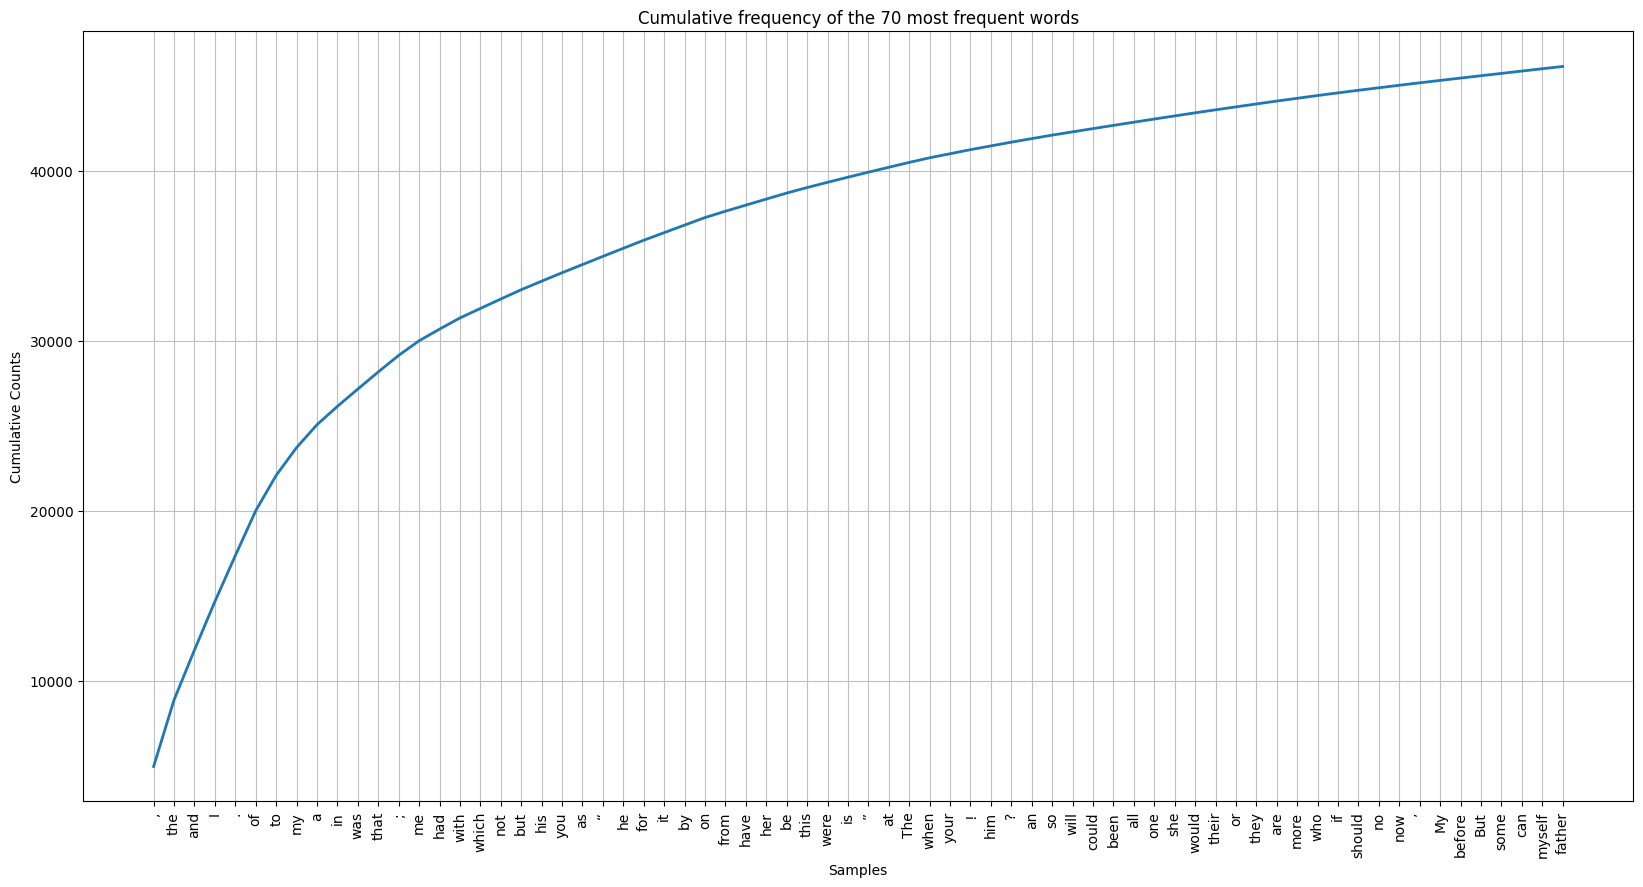

In [20]:
matplotlib.pyplot.figure(figsize=(20, 10))
fdist.plot(70, cumulative=True, title="Cumulative frequency of the 70 most frequent words")
matplotlib.pyplot.show()

**4b.** Veuillez construir une liste avec la longueur de chaque _token_ du texte.  La liste aura donc autant de nombres que de tokens.  Veuillez créer un nouvel objet `FreqDist` à partir de cette liste de nombres, et affichez la distribution _non-cumulative_ des nombres d'occurrences.  Quelle est la longueur la plus fréquente ?  Comment évolue la longueur en fonction de la fréquence ?

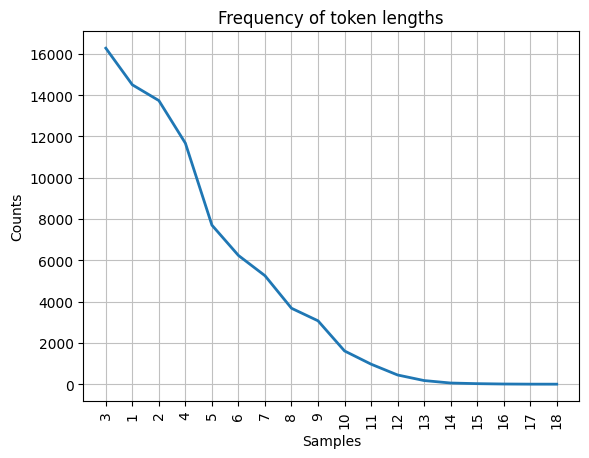

In [21]:
token_lengths = [len(token) for token in nltk_text]
fdist_length = nltk.FreqDist(token_lengths)

fdist_length.plot(title="Frequency of token lengths")
matplotlib.pyplot.show()

> Sans surprise, les mots courts sont ceux qui sont le plus fréquent, avec les tokens de trois lettres en premier, suivit par ceux d'une lettre puis par ceux de deux lettres. Les tokens de taille 1 contiennent les ponctuations, ce qui augmente grandement leur nombre. Quant aux tokens de taille 3, il s'agit généralemnt de mots communs, tels que "the", "and", "for", "was", etc. Dans un livre anglais comme celui choisis, il n'est donc pas surprenant de voir que plus les mots sont longs, moins ceux-ci sont fréquents dans le texte. On remarque même que leur fréquence décroit de façon presque exponentielle.

**4c.** Veuillez générer la liste des fréquences des mots de votre texte par ordre décroissant (sans les mots, seulement les valeurs des fréquences).  Limitez cette liste à *N* valeurs (par exemple *N* = 100).  Affichez avec `matplotlib.pyplot.plot` la courbe en fonction du rang, c'est-à-dire le rang (1, 2, 3, ..., **) sur l'axe *x* et la fréquence sur l'axe *y*.

Note : on génère directement des graphiques à partir de deux listes `x_values` et `y_values` avec la commande `matplotlib.pyplot.plot(x_values, y_values)`.

Ajoutez une deuxième courbe (dans la même commande `plot`) selon la formule *y* = *a* / (*x* + *b*) en choississant par essais successifs des valeurs de *a* et *b* qui vous rapprochent autant que possible de la courbe des fréquences.  Cette formule est appelée *Loi de Zipf* et illustre une propriété du vocabulaire d'un échantillon suffisamment grand de texte.

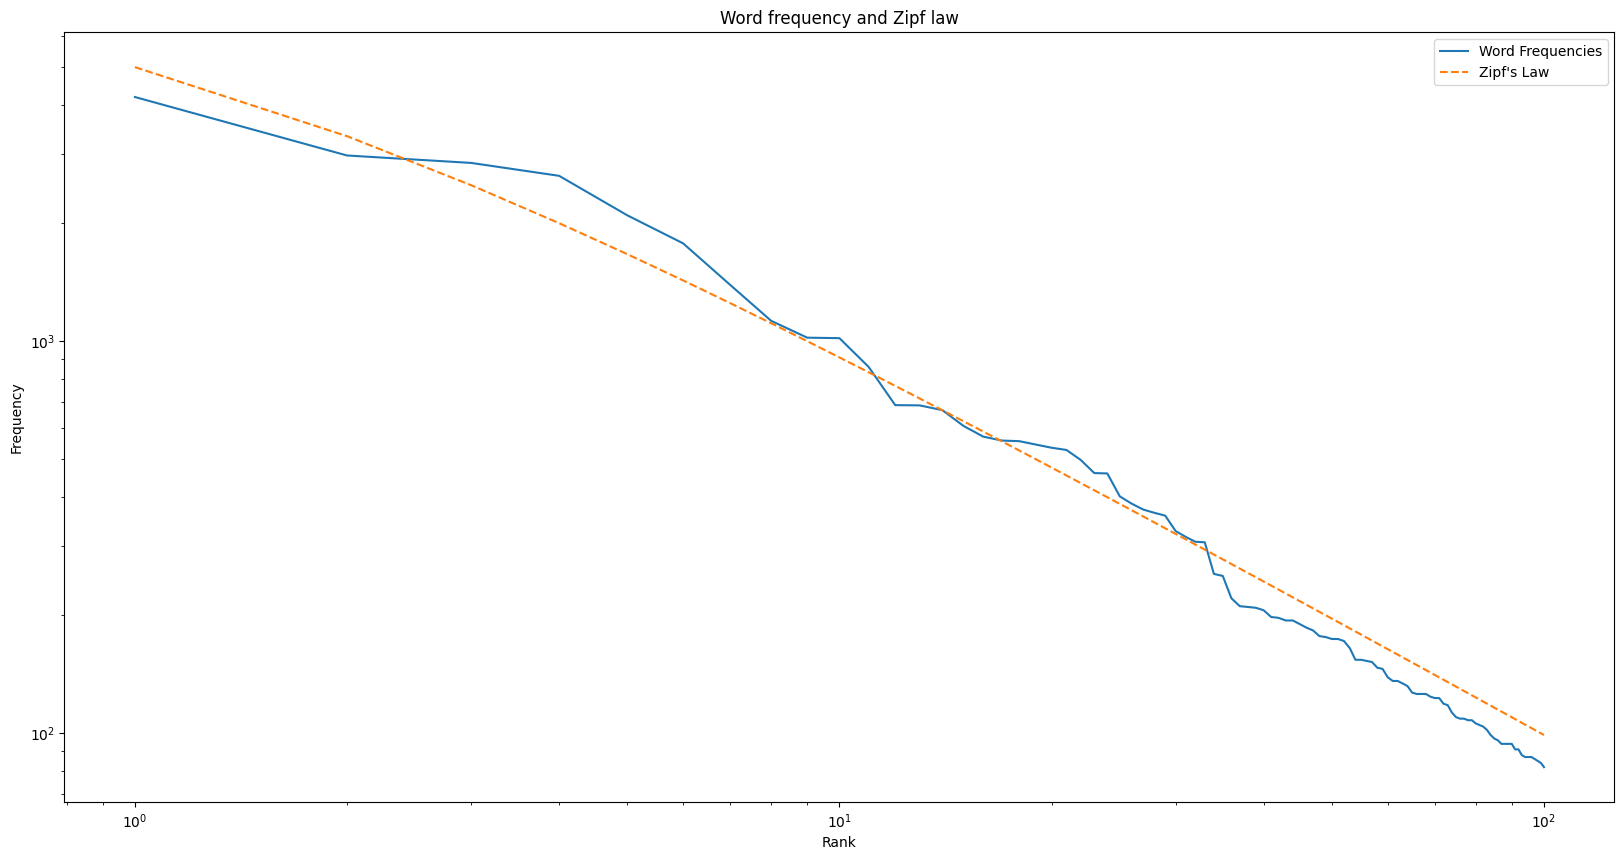

In [22]:
filtered_words = [word.lower() for word in nltk_text if word.isalpha()]
alpha_fdist = nltk.FreqDist(filtered_words)

# Get the N most common frequencies
N = 100
frequencies = [freq for _, freq in alpha_fdist.most_common(N)]
ranks = range(1, N + 1)

# Zipf's law: y = a / (x + b)
a = 10_000
b = 1
zipf = [a / (x + b) for x in ranks]

# Plot both curves
matplotlib.pyplot.figure(figsize=(20, 10))
matplotlib.pyplot.xlabel('Rank')
matplotlib.pyplot.xscale('log')
matplotlib.pyplot.ylabel('Frequency')
matplotlib.pyplot.yscale('log')
matplotlib.pyplot.title('Word frequency and Zipf law')
matplotlib.pyplot.plot(ranks, frequencies, label="Word Frequencies")
matplotlib.pyplot.plot(ranks, zipf, linestyle='--', label="Zipf's Law")
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

## Fin de la partie 1b
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_ en ajoutant vos deux noms.  Puis ajoutez-le dans une archive _zip_ avec le _notebook_ de la partie 1c, et soumettez l'archive sur Cyberlearn. 